In [3]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-12_04
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\corrected


In [5]:
file_s1 ='FGDOS_03F_HIGH_A3_1_Apr_12_19-17-47_s1.csv'
file_s2 ='FGDOS_03F_HIGH_A3_1_Apr_12_19-17-47_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s1 ,encoding='ISO-8859-1')
df_s2 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s2 ,encoding='ISO-8859-1')


FGDOS_03F_HIGH_A3_1_Apr_12_19-17-47_s1.csv
FGDOS_03F_HIGH_A3_1_Apr_12_19-17-47_s2.csv


In [6]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,3.2083,2,85,77247,71647,0,7.63,h,0,0
1,231.5587,2,85,77278,71632,0,7.63,h,0,0
2,494.0522,2,85,77270,71632,0,7.63,h,0,0
3,760.7607,2,85,77247,71632,0,7.63,h,0,0
4,1022.5369,2,85,77239,71632,0,7.63,h,0,0


In [43]:
df_s1.tail()
df_s2.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
2911,826960.0878,2,85,85845,71578,3,7.63,h,0,0
2912,827221.9200,2,85,85830,71571,3,7.63,h,0,0
2913,827746.4615,2,85,85861,71601,3,7.63,h,0,0
2914,828008.2080,2,85,85845,71609,3,7.63,h,0,0
2915,828274.5289,2,85,85884,71609,3,7.63,h,0,0


In [7]:
# TID Baseline levels but at 70 MeV 
energy = 70
dose_rate_air = 0.6  # Gy/min
conv_factor = 0.901   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

In [7]:
s1[s1[:,3]<90000]

array([[0.0, 1, 86, ..., 'h', 0, 0],
       [248.8174, 1, 86, ..., 'h', 0, 0],
       [511.0684, 1, 86, ..., 'h', 0, 0],
       ...,
       [827775.1741, 1, 86, ..., 'h', 0, 0],
       [828040.261, 1, 86, ..., 'h', 0, 0],
       [828302.9315, 1, 86, ..., 'h', 0, 0]], dtype=object)

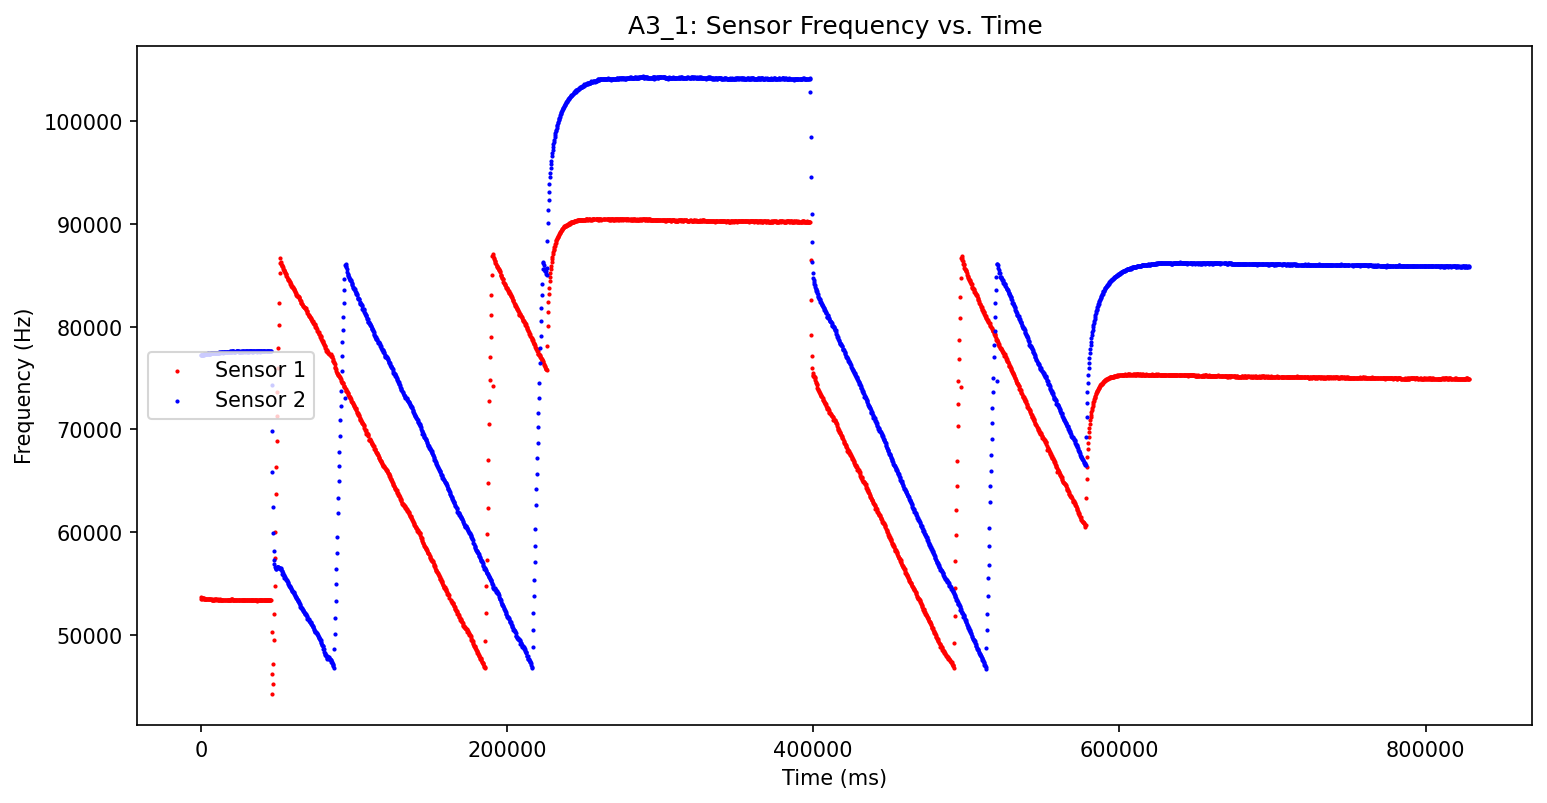

In [14]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(4.0e5,5.4e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("A3_1: Sensor Frequency vs. Time")
plt.show()

In [15]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 0.6e5
ul_1 = 1.75e5
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]

ll_2 = 4.0e5
ul_2 = 4.9e5
zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [16]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.013198900031592187
intercept: [71304.80777391]
slope: [[0.00595276]]
Sensor 1 sensitivity in kHz/Gy:  [[0.66068421]]


In [17]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9997238692009258
intercept: [102050.49313211]
slope: [[-0.29733403]]
Sensor 1 sensitivity in kHz/Gy:  [[33.00044777]]


In [18]:
# Sensitivity Sensor 1 - Zone 2
model_s1 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.999774585025429
intercept: [200452.23344466]
slope: [[-0.31334827]]
Sensor 1 sensitivity in kHz/Gy:  [[34.77783251]]


In [19]:
# Sensor 2 irradiation intervals
ll_1 = 1.0e5
ul_1 = 2.1e5
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

ll_2 = 4.0e5
ul_2 = 5.1e5
zone_2 = s2[(s2[:,0]> ll_2) & (s2[:,0]< ul_2)]

In [20]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.04967460406173163
intercept: [73722.99284864]
slope: [[0.0155311]]
Sensor 2 sensitivity in kHz/Gy:  [[1.72376229]]


In [21]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9997651497464084
intercept: [115498.88816214]
slope: [[-0.31755666]]
Sensor 2 sensitivity in kHz/Gy:  [[35.24491202]]


In [22]:
# Sensitivity Sensor 2 - Zone 2
model_s2 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)
print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9997078693395918
intercept: [217052.14372766]
slope: [[-0.33204461]]
Sensor 2 sensitivity in kHz/Gy:  [[36.85289812]]


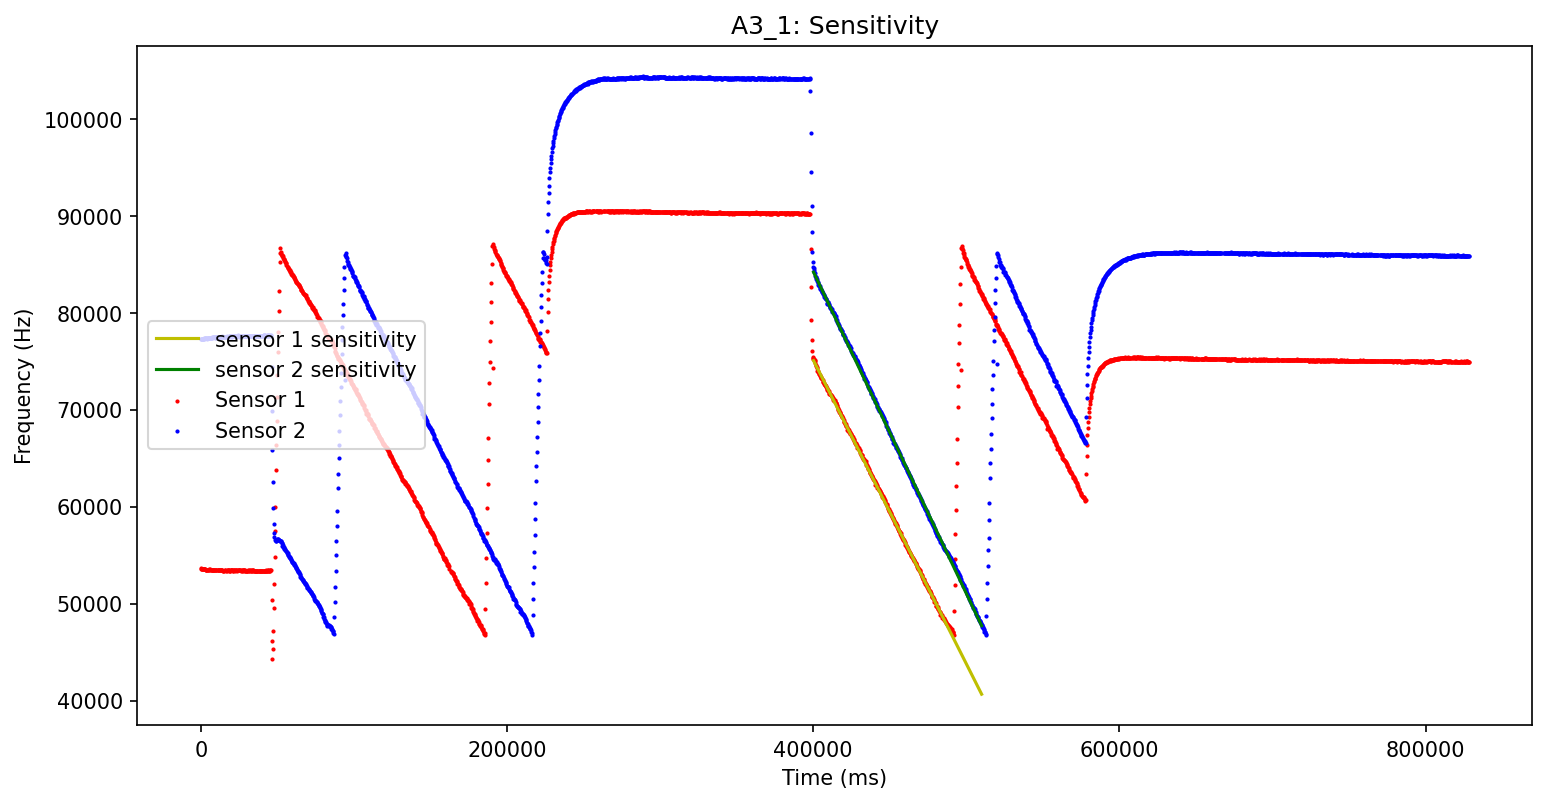

In [24]:
# Plot the linear regression lines
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A3_1: Sensitivity")
plt.show()

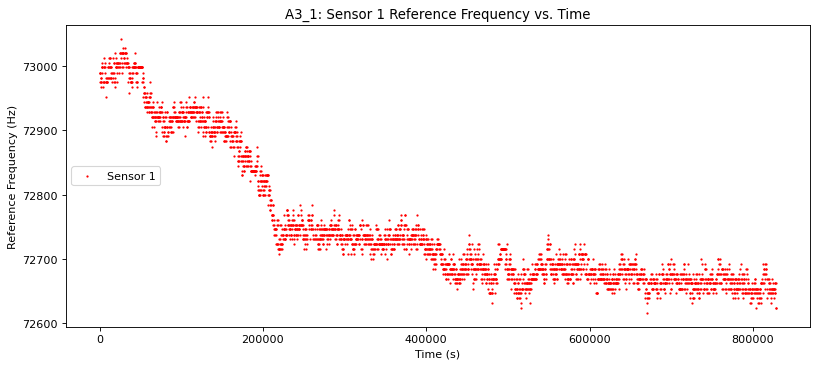

min:  72616
max:  73043
range:  427
mean:  72754.05732261448
standard deviation:  106.82892045252166


In [25]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')
#plt.scatter(s2[1:,0], s2[1:,4],s=1,label = 'Sensor 2')
#plt.plot(B4_PRE_TEST[1:,0], B4_PRE_TEST[1:,4],"g-",label = 'Reference frequency')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A3_1: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())
print('standard deviation: ',s1[:,4].std())

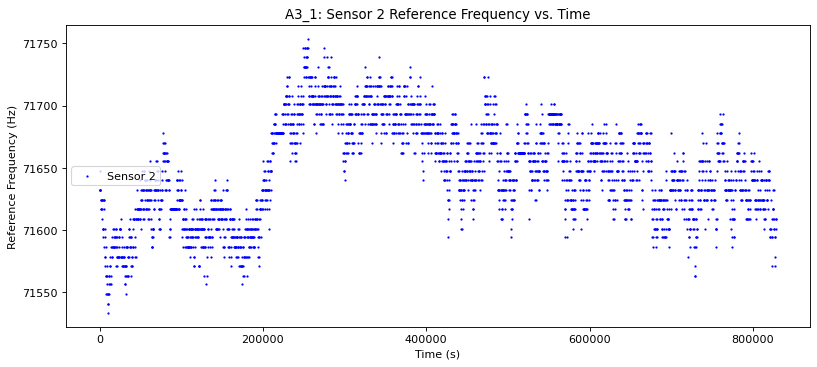

min:  71533
max:  71754
range:  221
mean:  71647.68244170096
standard deviation:  39.45987326928081


In [26]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A3_1: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())
print('standard deviation: ',s2[:,4].std())

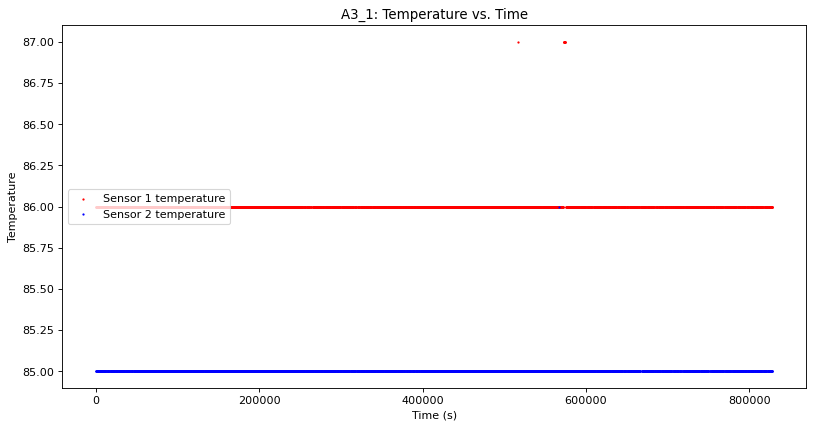

In [27]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("A3_1: Temperature vs. Time")
plt.show()

In [16]:
s1[:,0].shape
        

(1388,)

In [28]:
#s1[(s1[:,0]> 3e5)]

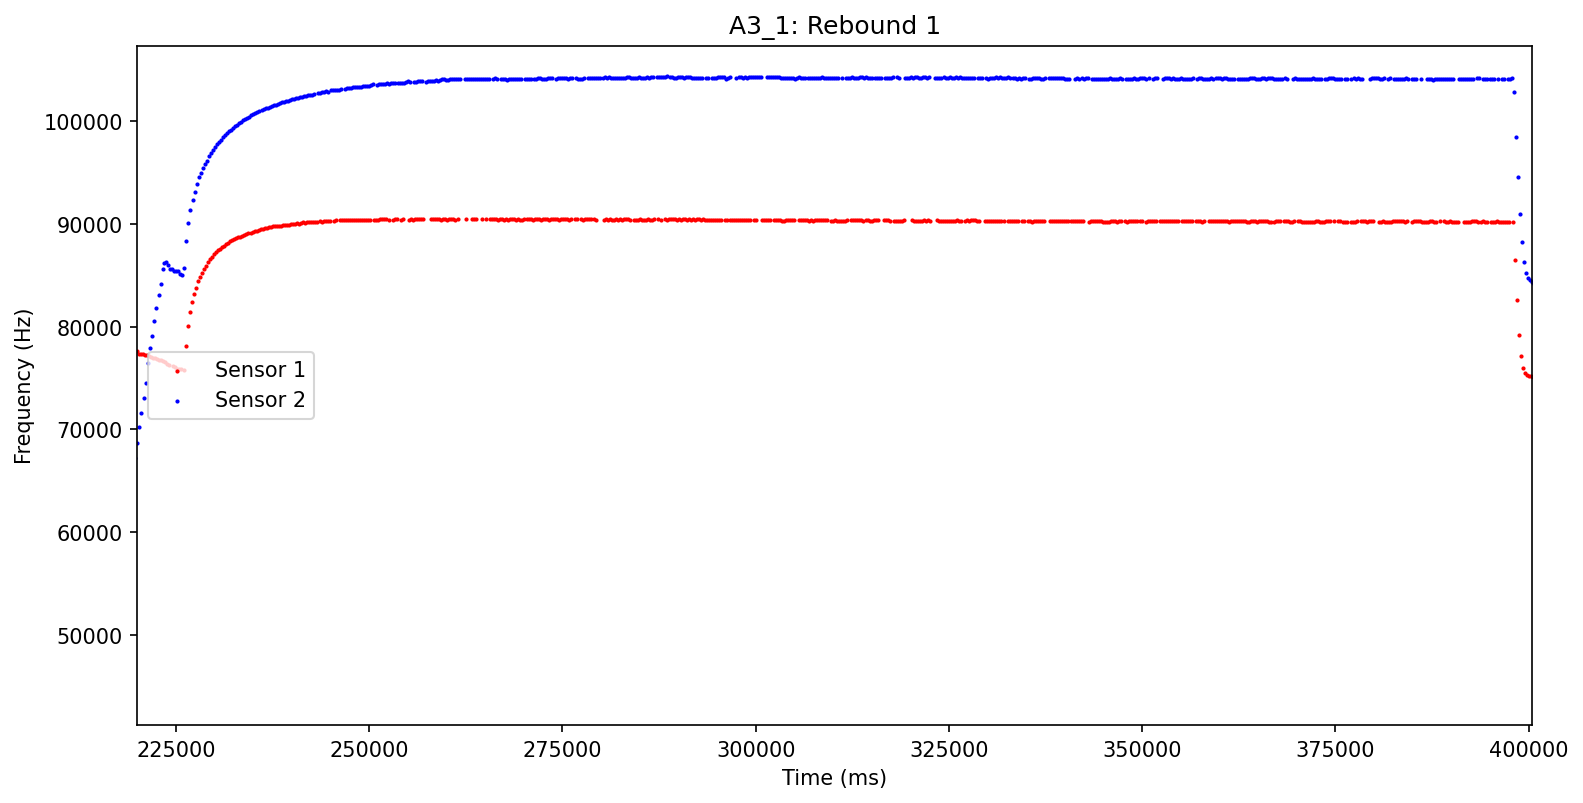

In [87]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.xlim(2.2e5,4.005e5)
#plt.xlim(3.8e5,4.0e5)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("A3_1: Rebound 1")
plt.show()

In [93]:
# specify time zones for capturing rebound effect

reb_1_t1 = 2.25e5
reb_1_t2 = 2.5e5
reb_1_t3 = 3.8e5
reb_1_t4 = 4.005e5

In [101]:
# SENSOR 1 Rebound 

# drop values during recharging
s1_rebound = s1[s1[:,5]<50] # recharge count column has values of around 128 while recharge is ongoing

s1_rebound_1 = s1_rebound[(s1_rebound[:,0] >= reb_1_t1) & (s1_rebound[:,0]<= reb_1_t3)] 
s1_level_1 = s1_rebound[(s1_rebound[:,0] >= reb_1_t2) & (s1_rebound[:,0]<= reb_1_t3)]
s1_drop_1 = s1_rebound[(s1_rebound[:,0] >= reb_1_t2) & (s1_rebound[:,0]<= reb_1_t4)]

rebound_1 = s1_level_1[:,3].mean() - s1_rebound_1[:,3].min()
drop_1 = s1_level_1[:,3].mean() - s1_drop_1[:,3].min()


print("Rebound starts at: ",s1_rebound_1[:,3].min())
print("Rebound levels off at: ",s1_level_1[:,3].mean())
print("Rebound drops off to: ",s1_drop_1[:,3].min())
print("Rebound: ",rebound_1)
print("Drop Off: ",drop_1)

Rebound starts at:  75813
Rebound levels off at:  90342.38657407407
Rebound drops off to:  75195
Rebound:  14529.386574074073
Drop Off:  15147.386574074073


In [100]:
# SENSOR 2 Rebound 

# drop values during recharging
s2_rebound = s2[s2[:,5]<50] # recharge count column has values of around 128 while recharge is ongoing

s2_rebound_1 = s2_rebound[(s2_rebound[:,0] >= reb_1_t1) & (s2_rebound[:,0]<= reb_1_t3)] 
s2_level_1 = s2_rebound[(s2_rebound[:,0] >= reb_1_t2) & (s2_rebound[:,0]<= reb_1_t3)]
s2_drop_1 = s2_rebound[(s2_rebound[:,0] >= reb_1_t2) & (s2_rebound[:,0]<= reb_1_t4)]

rebound_1 = s2_level_1[:,3].mean() - s2_rebound_1[:,3].min()
drop_1 = s2_level_1[:,3].mean() - s2_drop_1[:,3].min()


print("Rebound starts at: ",s2_rebound_1[:,3].min())
print("Rebound levels off at: ",s2_level_1[:,3].mean())
print("Rebound drops off to: ",s2_drop_1[:,3].min())
print("Rebound: ",rebound_1)
print("Drop Off: ",drop_1)

Rebound starts at:  85029
Rebound levels off at:  104149.51002227172
Rebound drops off to:  84373
Rebound:  19120.510022271716
Drop Off:  19776.510022271716


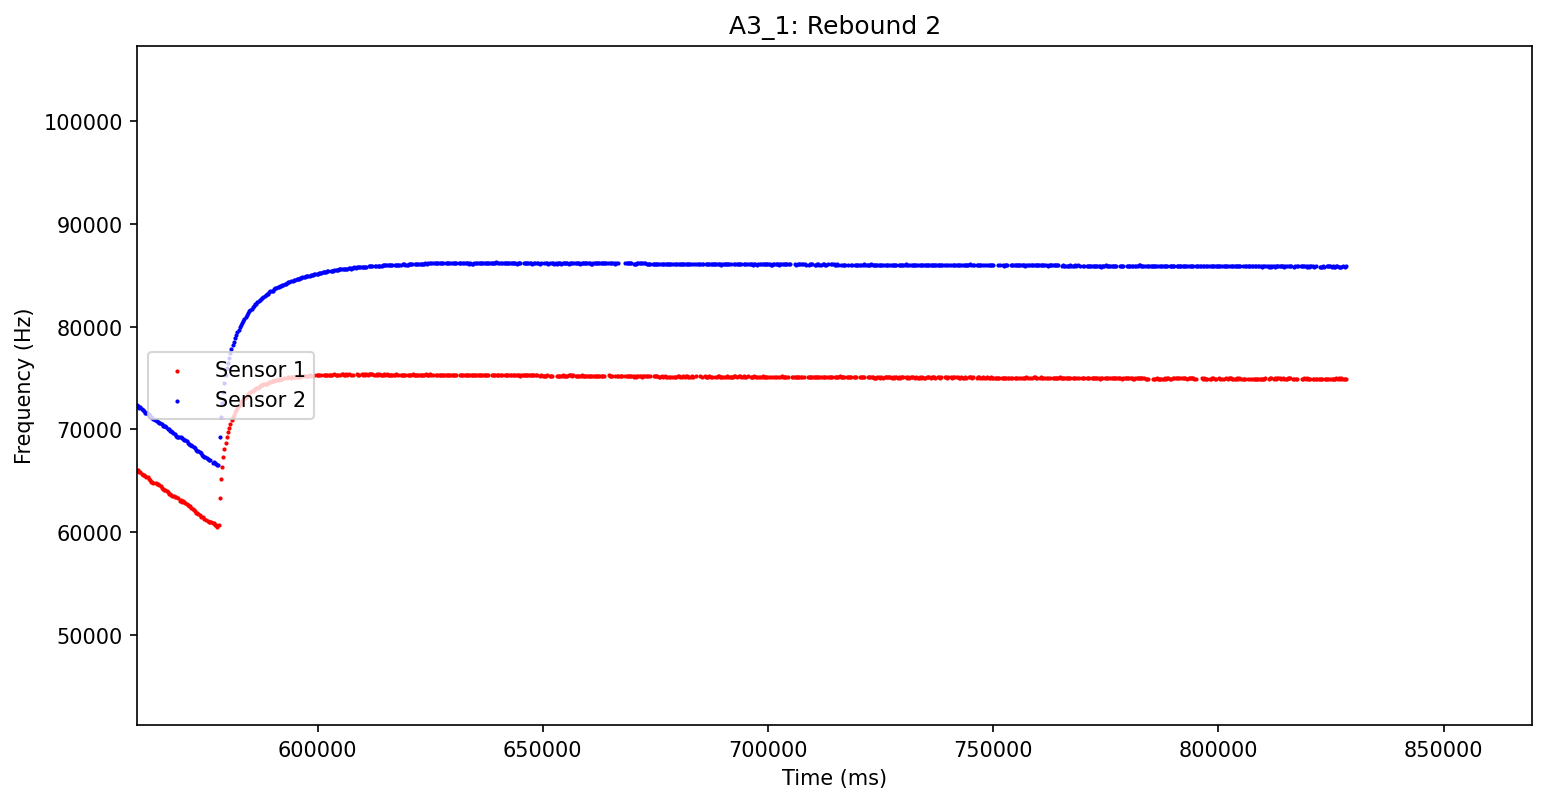

In [48]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.xlim(5.6e5,)
#plt.xlim(ll_2,ul_2)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("A3_1: Rebound 2")
plt.show()

In [8]:
# specify time zones for capturing rebound effect

reb_1_t1 = 5.6e5
reb_1_t2 = 6.2e5
reb_1_t3 = 8.2e5
#reb_1_t4 = NA

In [10]:
# SENSOR 1 Rebound 

# drop values during recharging
s1_rebound = s1[s1[:,5]<50] # recharge count column has values of around 128 while recharge is ongoing

s1_rebound_1 = s1_rebound[(s1_rebound[:,0] >= reb_1_t1) & (s1_rebound[:,0]<= reb_1_t3)] 
s1_level_1 = s1_rebound[(s1_rebound[:,0] >= reb_1_t2) & (s1_rebound[:,0]<= reb_1_t3)]
#s1_drop_1 = s1_rebound[(s1_rebound[:,0] >= reb_1_t2) & (s1_rebound[:,0]<= reb_1_t4)]

rebound_1 = s1_level_1[:,3].mean() - s1_rebound_1[:,3].min()
#drop_1 = s1_level_1[:,3].mean() - s1_drop_1[:,3].min()


print("Rebound starts at: ",s1_rebound_1[:,3].min())
print("Rebound levels off at: ",s1_level_1[:,3].mean())
#print("Rebound drops off to: ",s1_drop_1[:,3].min())
print("Rebound: ",rebound_1)
#print("Drop Off: ",drop_1)

Rebound starts at:  60539
Rebound levels off at:  75106.12068965517
Rebound:  14567.120689655174


In [11]:
# SENSOR 2 Rebound 

# drop values during recharging
s2_rebound = s2[s2[:,5]<50] # recharge count column has values of around 128 while recharge is ongoing

s2_rebound_1 = s2_rebound[(s2_rebound[:,0] >= reb_1_t1) & (s2_rebound[:,0]<= reb_1_t3)] 
s2_level_1 = s2_rebound[(s2_rebound[:,0] >= reb_1_t2) & (s2_rebound[:,0]<= reb_1_t3)]
#s2_drop_1 = s2_rebound[(s2_rebound[:,0] >= reb_1_t2) & (s2_rebound[:,0]<= reb_1_t4)]

rebound_1 = s2_level_1[:,3].mean() - s2_rebound_1[:,3].min()
#drop_1 = s2_level_1[:,3].mean() - s2_drop_1[:,3].min()


print("Rebound starts at: ",s2_rebound_1[:,3].min())
print("Rebound levels off at: ",s2_level_1[:,3].mean())
#print("Rebound drops off to: ",s2_drop_1[:,3].min())
print("Rebound: ",rebound_1)
#print("Drop Off: ",drop_1)

Rebound starts at:  66520
Rebound levels off at:  86037.501529052
Rebound:  19517.501529051995


In [41]:
# Filtering of sensor & Reference frequencies
#Moving average filter with N point average

from scipy.ndimage.filters import uniform_filter1d

N=100
y = uniform_filter1d(s1[:,4].astype(int), size=N)
print(y)
print(y.shape)

[72988 72988 72988 ... 72658 72658 72658]
(2861,)


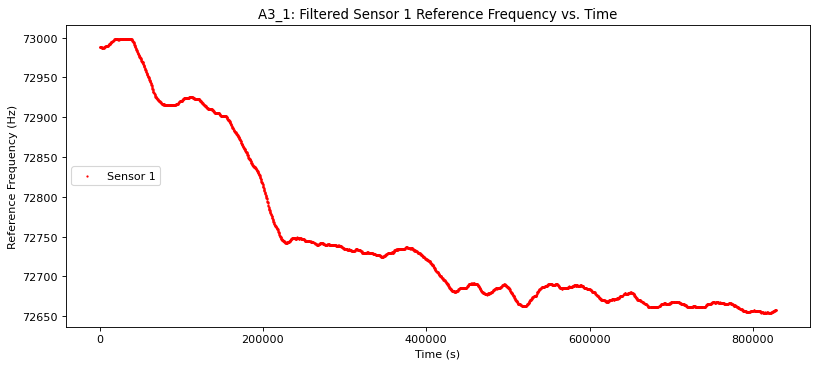

min:  72654
max:  72999
range:  383
mean:  72753.61831527438
sigma:  105.57643440829808


In [42]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], y,s=1, c='r', label = 'Sensor 1')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("A3_1: Filtered Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',y.min())
print('max: ',y.max())
print('range: ',y.max()-s1[:,4].min())
print('mean: ',y.mean())
print('sigma: ',y.std())